In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv('Social_Media .csv')

In [4]:
data

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,1884,3,88,1451,75,2,0,Noon,2,11,...,0,0,1,0,0,0,0,0,10,0.350746
1884,1885,3,58,10537,40,2,0,Evening,2,11,...,0,0,0,0,0,0,0,0,11,0.004728
1885,1886,3,89,11050,26,1,0,Evening,15,9,...,0,0,0,0,0,0,0,0,6,0.008289
1886,1887,3,58,10537,40,1,0,Evening,2,11,...,0,0,0,0,0,0,0,0,16,0.012014


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  is_emo

In [6]:
data.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

In [7]:
data.corr()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
campaign_id,1.000000,0.443314,-0.052252,0.200128,0.028225,0.036410,0.051932,0.289416,0.209435,0.117558,...,-0.022799,0.219755,-0.006662,NaN,-0.128840,-0.002232,-0.041955,-0.058105,-0.104905,0.053315
sender,0.443314,1.000000,-0.102559,0.197929,0.056891,-0.046928,-0.059499,0.188444,0.070689,0.100454,...,-0.093244,0.147959,0.020928,NaN,-0.105279,-0.046900,0.024099,-0.071096,-0.132554,-0.031398
subject_len,-0.052252,-0.102559,1.000000,0.427326,-0.224770,-0.033574,-0.056666,0.012601,-0.007108,0.400213,...,-0.002214,-0.293446,0.120273,NaN,0.080303,0.125134,0.033410,0.100584,-0.021855,-0.180143
body_len,0.200128,0.197929,0.427326,1.000000,-0.496146,-0.089146,-0.079255,0.026781,-0.027747,0.559353,...,-0.021254,-0.220696,0.184035,NaN,-0.043931,0.051123,0.022431,0.023734,-0.075754,-0.247866
mean_paragraph_len,0.028225,0.056891,-0.224770,-0.496146,1.000000,0.003221,-0.012964,0.037475,-0.054066,-0.170012,...,-0.091250,0.162480,-0.096086,NaN,-0.043173,-0.032096,0.006765,-0.037435,-0.110896,0.178042
day_of_week,0.036410,-0.046928,-0.033574,-0.089146,0.003221,1.000000,0.720599,-0.058760,0.000249,-0.037789,...,0.019365,-0.069705,-0.032476,NaN,-0.013571,-0.037122,-0.013822,0.012735,0.081693,0.086372
is_weekend,0.051932,-0.059499,-0.056666,-0.079255,-0.012964,0.720599,1.000000,-0.063763,-0.015759,-0.033464,...,0.036626,-0.065130,-0.033968,NaN,-0.007504,-0.033757,-0.036255,-0.009789,0.046638,0.114138
category,0.289416,0.188444,0.012601,0.026781,0.037475,-0.058760,-0.063763,1.000000,0.007144,-0.023931,...,-0.028794,0.132441,-0.101411,NaN,0.100071,0.166200,0.068450,0.189839,-0.026602,-0.167756
product,0.209435,0.070689,-0.007108,-0.027747,-0.054066,0.000249,-0.015759,0.007144,1.000000,0.027486,...,0.027952,0.047566,-0.104653,NaN,0.013122,-0.018291,-0.060512,-0.110753,0.058073,0.121602
no_of_CTA,0.117558,0.100454,0.400213,0.559353,-0.170012,-0.037789,-0.033464,-0.023931,0.027486,1.000000,...,-0.005971,-0.145453,0.092320,NaN,-0.037244,0.041797,-0.015229,-0.015649,-0.007979,-0.172637


In [8]:
data['is_timer']

0       0
1       0
2       0
3       0
4       0
       ..
1883    0
1884    0
1885    0
1886    0
1887    0
Name: is_timer, Length: 1888, dtype: int64

In [9]:
data[data.duplicated()]

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate


In [10]:
data.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image',
       'is_personalised', 'is_quote', 'is_timer', 'is_emoticons',
       'is_discount', 'is_price', 'is_urgency', 'target_audience',
       'click_rate'],
      dtype='object')

In [7]:
data.drop(['campaign_id','is_timer'], axis = 1, inplace = True)

In [17]:
data.drop(['times_of_day'], axis = 1, inplace = True)

In [10]:
data

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,3,76,10439,39,5,1,6,26,3,29,0,0,0,0,0,0,0,14,0.103079
1,3,54,2570,256,5,1,2,11,0,22,0,0,0,0,0,0,0,10,0.700000
2,3,59,12801,16,5,1,2,11,3,23,1,0,1,0,0,0,0,16,0.002769
3,3,74,11037,30,4,0,15,9,4,24,0,0,0,0,0,0,0,10,0.010868
4,3,80,10011,27,5,1,6,26,3,31,0,0,1,0,0,0,0,14,0.142826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,3,88,1451,75,2,0,2,11,0,22,0,0,1,0,0,0,0,10,0.350746
1884,3,58,10537,40,2,0,2,11,5,27,0,0,0,0,0,0,0,11,0.004728
1885,3,89,11050,26,1,0,15,9,4,28,0,0,0,0,0,0,0,6,0.008289
1886,3,58,10537,40,1,0,2,11,5,27,0,0,0,0,0,0,0,16,0.012014


In [29]:
data.corr()

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
sender,1.000000,-0.102559,0.197929,0.056891,-0.046928,-0.059499,0.188444,0.070689,0.100454,0.016604,-0.093244,0.147959,0.020928,-0.105279,-0.046900,0.024099,-0.071096,-0.132554,-0.031398
subject_len,-0.102559,1.000000,0.427326,-0.224770,-0.033574,-0.056666,0.012601,-0.007108,0.400213,0.144261,-0.002214,-0.293446,0.120273,0.080303,0.125134,0.033410,0.100584,-0.021855,-0.180143
body_len,0.197929,0.427326,1.000000,-0.496146,-0.089146,-0.079255,0.026781,-0.027747,0.559353,0.083468,-0.021254,-0.220696,0.184035,-0.043931,0.051123,0.022431,0.023734,-0.075754,-0.247866
mean_paragraph_len,0.056891,-0.224770,-0.496146,1.000000,0.003221,-0.012964,0.037475,-0.054066,-0.170012,0.064632,-0.091250,0.162480,-0.096086,-0.043173,-0.032096,0.006765,-0.037435,-0.110896,0.178042
day_of_week,-0.046928,-0.033574,-0.089146,0.003221,1.000000,0.720599,-0.058760,0.000249,-0.037789,-0.003614,0.019365,-0.069705,-0.032476,-0.013571,-0.037122,-0.013822,0.012735,0.081693,0.086372
is_weekend,-0.059499,-0.056666,-0.079255,-0.012964,0.720599,1.000000,-0.063763,-0.015759,-0.033464,-0.032421,0.036626,-0.065130,-0.033968,-0.007504,-0.033757,-0.036255,-0.009789,0.046638,0.114138
category,0.188444,0.012601,0.026781,0.037475,-0.058760,-0.063763,1.000000,0.007144,-0.023931,0.127554,-0.028794,0.132441,-0.101411,0.100071,0.166200,0.068450,0.189839,-0.026602,-0.167756
product,0.070689,-0.007108,-0.027747,-0.054066,0.000249,-0.015759,0.007144,1.000000,0.027486,0.043223,0.027952,0.047566,-0.104653,0.013122,-0.018291,-0.060512,-0.110753,0.058073,0.121602
no_of_CTA,0.100454,0.400213,0.559353,-0.170012,-0.037789,-0.033464,-0.023931,0.027486,1.000000,0.170387,-0.005971,-0.145453,0.092320,-0.037244,0.041797,-0.015229,-0.015649,-0.007979,-0.172637
mean_CTA_len,0.016604,0.144261,0.083468,0.064632,-0.003614,-0.032421,0.127554,0.043223,0.170387,1.000000,-0.021751,-0.123560,0.023271,0.032827,0.029194,0.013934,0.100071,0.007170,-0.031162


In [36]:
x = data.iloc[0:,:-1].values #model1
y = data['click_rate'].values

In [35]:
x.shape

(1888, 20)

In [126]:
x1 = data.drop(['target_audience','is_price','click_rate','is_personalised','is_image','mean_CTA_len','sender'], axis = 1).values
#model2

In [130]:
x2 = x1 = data.drop(['target_audience','is_price','click_rate','is_personalised','is_image','mean_CTA_len','sender','is_discount','is_emoticons','day_of_week'], axis = 1).values
#model3

In [234]:
x3 = data[['subject_len','body_len','mean_paragraph_len','no_of_CTA','mean_CTA_len']].values

In [235]:
x3

array([[   76, 10439,    39,     3,    29],
       [   54,  2570,   256,     0,    22],
       [   59, 12801,    16,     3,    23],
       ...,
       [   89, 11050,    26,     4,    28],
       [   58, 10537,    40,     5,    27],
       [   89, 11050,    26,     4,    28]], dtype=int64)

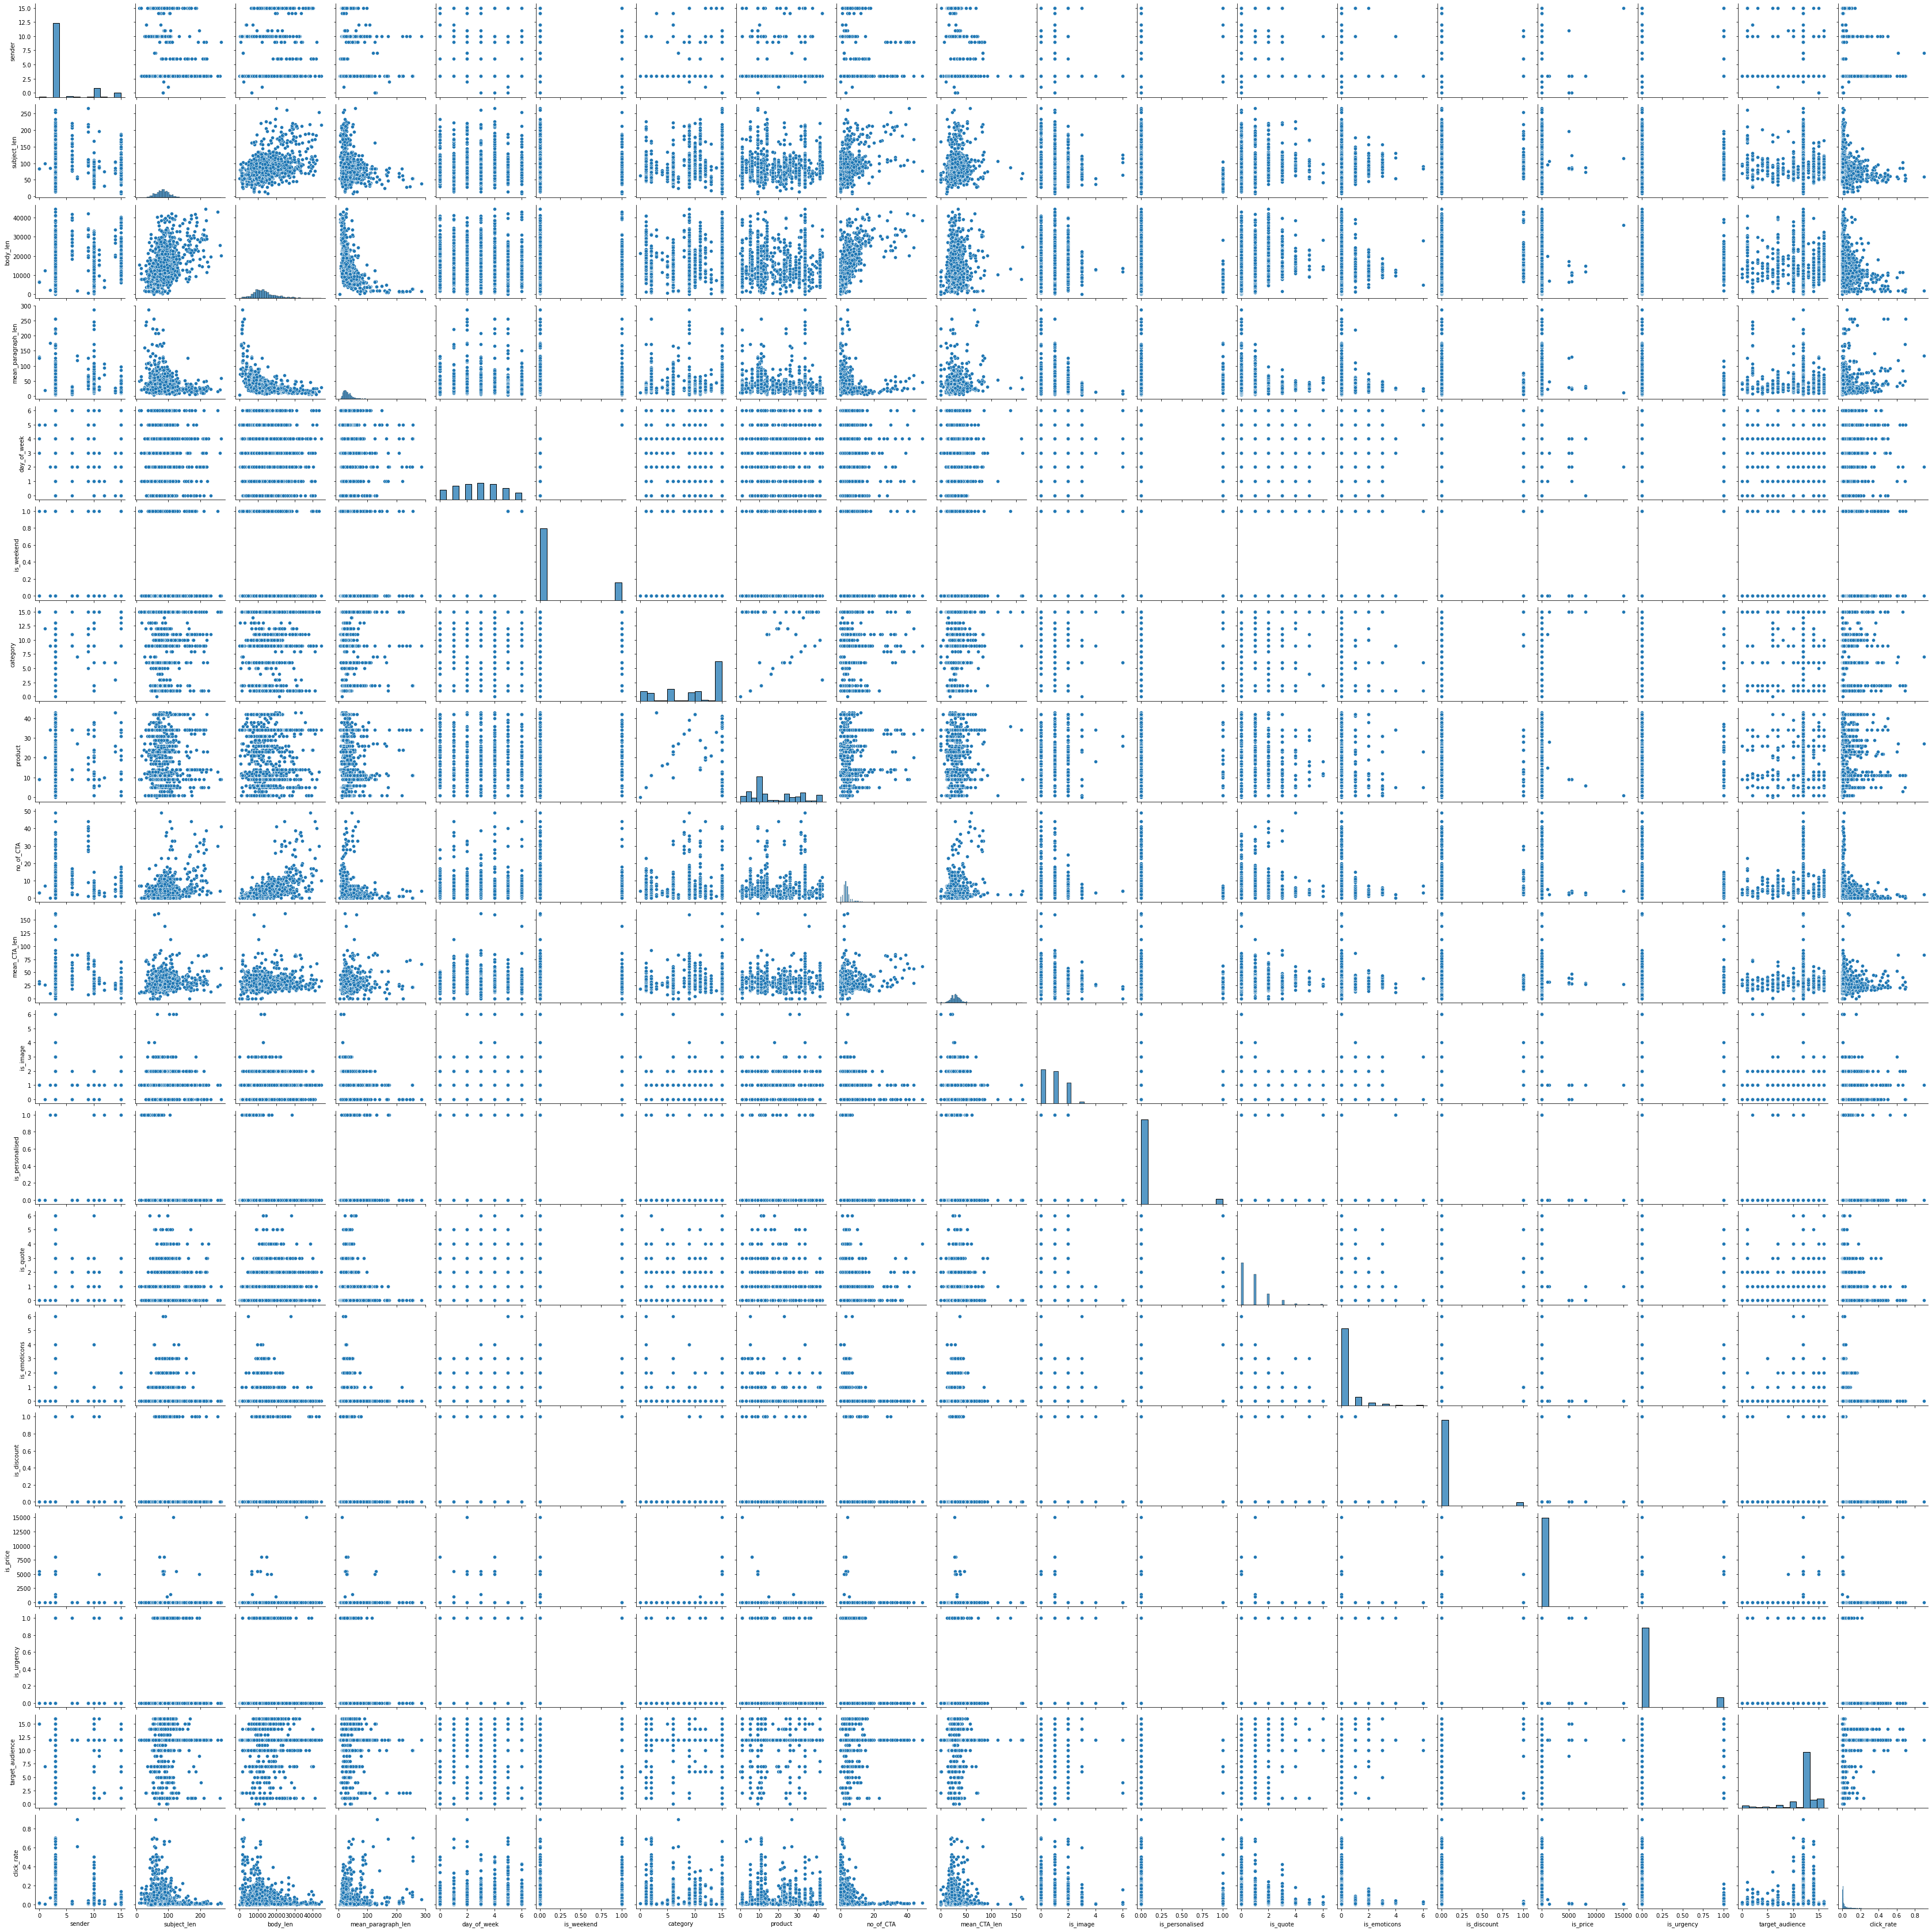

In [229]:
sns.pairplot(data)

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [38]:
x_train.shape

(1510, 20)

In [39]:
x_test.shape

(378, 20)

In [40]:
ss = StandardScaler()

In [41]:
x_train = ss.fit_transform(x_train)

In [42]:
x_test = ss.transform(x_test)

In [43]:
reg = LinearRegression()

In [44]:
reg.fit(x_train,y_train)

LinearRegression()

In [45]:
y_pred = reg.predict(x_test)

In [46]:
reg.coef_

array([ 1.09690697e-02, -4.68484114e-03, -5.72627143e-03, -9.60260928e-03,
        1.03198025e-02, -1.08858839e-03,  7.11763225e-03, -1.56416011e-02,
        8.41519893e-03, -6.80745691e-03,  3.29199844e-05, -2.41131311e-03,
       -2.83817734e-03, -5.57048877e-03,  0.00000000e+00, -5.62126171e-03,
       -2.20807148e-03, -6.71816464e-04, -4.46855744e-03,  3.55475124e-03])

In [47]:
reg.intercept_

0.04338913205493307

In [67]:
print('Mean absolute error :', round(metrics.mean_absolute_error(y_test,y_pred),3))
print('Mean Squared error :', round(metrics.mean_squared_error(y_test,y_pred),3))
print('Root mean squared error :', round((np.sqrt(metrics.mean_squared_error(y_test,y_pred)))),4)
print('R2 Score :',round(metrics.r2_score(y_test,y_pred),3))

Mean absolute error : 0.042
Mean Squared error : 0.004
Root mean squared error : 0 4
R2 Score : 0.145


Max R2 score I am getting is .145. I tried various models, and the best model is of *x*

In [57]:
print('R2 Score :',round(metrics.r2_score(y_test,y_pred),3))

R2 Score : 0.145
